# Decision Tree in Machine Learning

<img src="https://editor.analyticsvidhya.com/uploads/52036dt.jpg" height=500 width=500>

## Load the Data

In [197]:
import opendatasets as od
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
od.download('https://www.kaggle.com/datasets/damiencosta/decision-tree-regressor-house-prices')

100%|█████████████████████████████████████████| 94.0k/94.0k [00:00<00:00, 333kB/s]

In [198]:
df = pd.read_csv('decision-tree-regressor-house-prices/house_prices.csv')

In [199]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Clean the Data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [207]:
df.columns[df.isna().sum()>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [203]:
df.columns[df.isna().sum()>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
df.columns[df.isna().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [208]:
df[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [210]:
df.Alley.isna().sum()

1369

In [213]:
#df.drop('Alley',axis=1, inplace=True)

In [214]:
df.PoolQC.isna().sum()

1453

In [215]:
df.Fence.isna().sum()

1179

In [216]:
df.MiscFeature.isna().sum()

1406

In [217]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [13]:
df[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond','SalePrice']].select_dtypes(np.number).corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


In [218]:
df.LotFrontage.isna().sum()

259

In [219]:
df['LotFrontage'].mean()

70.04995836802665

In [220]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [221]:
df.LotFrontage.isna().sum()

0

In [222]:
df.MasVnrArea.isna().sum()

8

In [223]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [224]:
df.MasVnrArea.isna().sum()

0

In [225]:
df.GarageYrBlt.isna().sum()

81

In [226]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [227]:
df.GarageYrBlt.isna().sum()

0

In [228]:
df.columns[df.isna().sum() > 0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [229]:
df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']].isna().sum()

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [230]:
df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']]= df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [231]:
df.columns[df.isna().sum() > 0]

Index(['FireplaceQu'], dtype='object')

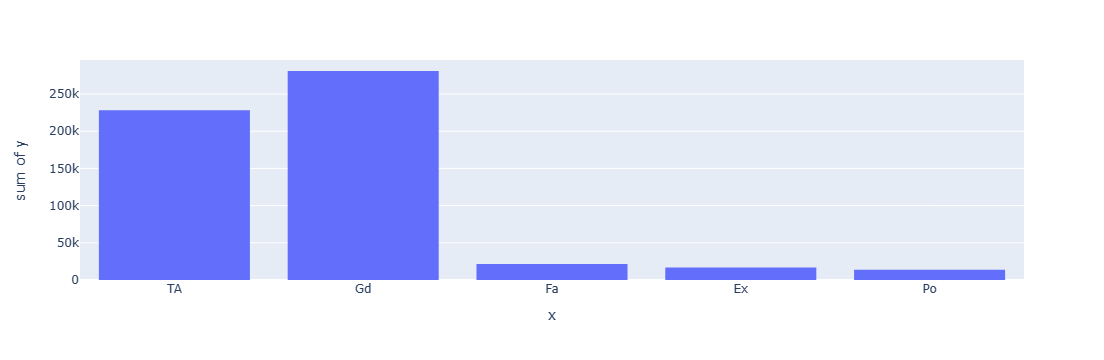

In [232]:
px.histogram(x=df.FireplaceQu,y=df.Id)

In [233]:
choices = ['TA', 'Gd']

In [234]:
df.FireplaceQu = df.FireplaceQu.apply(lambda x: np.random.choice(choices) if pd.isna(x) else x)

In [235]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

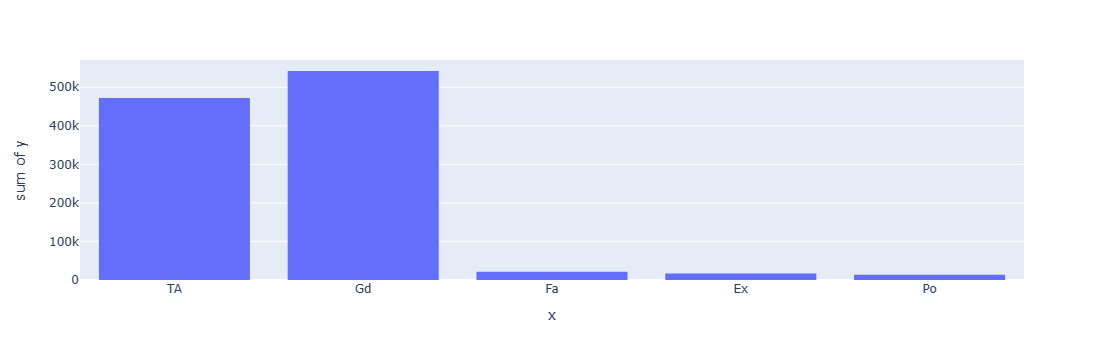

In [237]:
px.histogram(x=df.FireplaceQu,y=df.Id)

### Check for Outliers

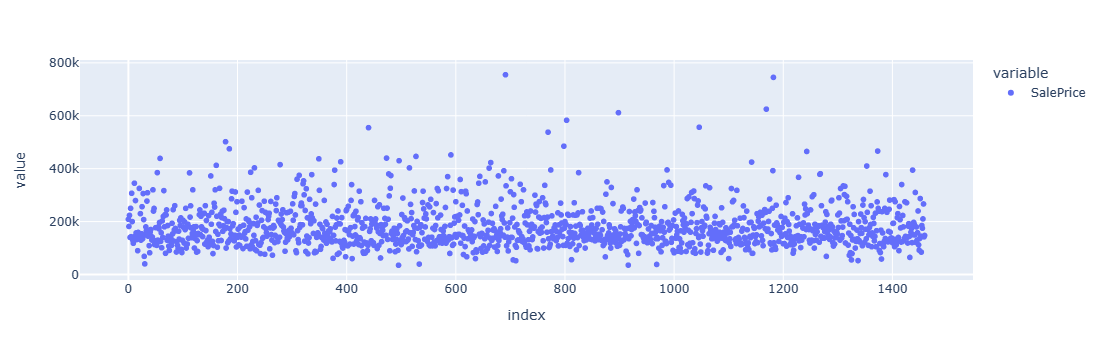

In [34]:
px.scatter(df.SalePrice)

## Split the Data

In [238]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [242]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [241]:
inputs = list(df.columns[1:-1])

In [37]:
#inputs

In [38]:
target = 'SalePrice'

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
train_val_df, test_df = train_test_split(df, test_size=0.2,random_state=42)

In [245]:
train_df,val_df = train_test_split(train_val_df,test_size=0.25,random_state=42)

In [246]:
train_inputs = train_df[inputs]
train_target = train_df[target]

In [247]:
val_inputs = val_df[inputs]
val_target = val_df[target]

In [248]:
test_inputs = test_df[inputs]
test_target = test_df[target]

## Preprocess the Data

### Scaling

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
numerics = list(df[inputs].select_dtypes(np.number).columns)

In [251]:
scaler = StandardScaler()

In [252]:
scaler.fit(df[numerics])

StandardScaler()

In [253]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4072025852.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4072025852.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4072025852.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [254]:
train_inputs[numerics].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,876.000000,8.760000e+02,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,...,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,-0.006803,8.367523e-03,0.036461,0.008257,0.019498,-0.031026,-0.002401,0.011719,0.009100,-0.012156,...,0.001134,0.007569,0.037825,-0.002444,-0.010509,-0.000909,0.029423,-0.002109,0.019852,-0.002236
std,0.987129,1.051460e+00,1.196592,0.998747,1.018286,1.022668,1.003647,0.943913,1.026084,0.986849,...,0.989872,1.010177,1.037932,1.026235,0.861513,0.961831,1.196558,0.713958,0.994503,1.003559
min,-0.872563,-2.227875e+00,-0.905990,-3.688413,-4.112970,-3.287824,-1.689368,-0.574410,-0.973018,-0.288653,...,-2.212963,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,-1.367655
25%,-0.872563,-4.564744e-01,-0.296339,-0.795151,-0.517200,-0.638164,-0.914112,-0.574410,-0.973018,-0.288653,...,-0.640898,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
50%,-0.163109,6.454645e-16,-0.092337,-0.071836,-0.517200,0.024251,0.442586,-0.574410,-0.147255,-0.288653,...,0.032844,-0.752176,-0.296834,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.138777
75%,0.309859,3.724502e-01,0.112567,0.651479,0.381743,0.951632,0.927122,0.368765,0.625322,-0.288653,...,0.482006,0.588651,0.397681,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,0.891994
max,3.147673,1.103492e+01,20.518273,2.821425,3.078570,1.282839,1.217843,5.225910,11.405753,6.699887,...,4.421526,4.595168,7.191843,8.675309,10.256507,7.623823,18.306180,16.647766,2.100892,1.645210


### Encoding

In [255]:
from sklearn.preprocessing import OneHotEncoder

In [256]:
categoricals = list(df[inputs].select_dtypes('object').columns)

In [257]:
categoricals

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [258]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [259]:
encoder.fit(df[categoricals])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [260]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

encoded_cols

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst

In [262]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4086463923.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4086463923.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/4086463923.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [263]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1096944552.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1096944552.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1096944552.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [264]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1885346806.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1885346806.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_28528/1885346806.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [265]:
train_inputs[encoded_cols]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
683,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1077,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
463,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
657,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
835,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
401,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
957,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Fit the Data

### Linear Regression

In [266]:
from sklearn.linear_model import LinearRegression

In [267]:
lin_model = LinearRegression()

In [268]:
lin_model.fit(train_inputs[numerics + encoded_cols], train_target)

LinearRegression()

In [269]:
train_preds = lin_model.predict(train_inputs[numerics + encoded_cols])

In [270]:
val_preds = lin_model.predict(val_inputs[numerics + encoded_cols])

### Evaluate the Model

In [271]:
from sklearn.metrics import mean_squared_error as mse

In [272]:
mse(train_target, train_preds,squared=False)

18540.033478117573

In [273]:
mse(val_target, val_preds,squared=False)

141481007806659.2

In [274]:
?LinearRegression

### Decision Tree

In [275]:
from sklearn.tree import DecisionTreeRegressor

In [276]:
model = DecisionTreeRegressor()

In [277]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeRegressor()

In [278]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

### Evaluate the Model

In [279]:
mse(train_target, train_preds,squared=False)

0.0

In [280]:
mse(val_target, val_preds,squared=False)

52553.98829413295

In [75]:
val_df[target].describe()

count       292.000000
mean     182064.263699
std       77517.741601
min       55000.000000
25%      129800.000000
50%      165450.000000
75%      218750.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [281]:
model.feature_importances_

array([4.55201228e-04, 3.64951907e-02, 7.99367944e-03, 5.66299458e-01,
       1.06427764e-03, 6.44081354e-03, 1.13584881e-03, 7.83824408e-03,
       1.16982718e-02, 1.29204704e-04, 1.51012941e-03, 3.19422053e-02,
       6.22654078e-02, 2.69833088e-03, 3.45952670e-04, 8.26751675e-02,
       2.93332988e-04, 2.79426784e-06, 3.03605273e-04, 4.32600033e-03,
       5.14320675e-04, 6.35742845e-04, 2.52211926e-02, 1.03021374e-03,
       6.41695113e-03, 9.19626355e-04, 3.33077429e-02, 1.24600803e-03,
       3.96277053e-03, 1.01732808e-03, 0.00000000e+00, 9.67836254e-08,
       2.56019314e-03, 1.05647472e-06, 5.53731826e-03, 6.80091658e-04,
       0.00000000e+00, 1.22123505e-05, 0.00000000e+00, 3.07468299e-05,
       2.46331452e-04, 0.00000000e+00, 0.00000000e+00, 4.59171554e-04,
       0.00000000e+00, 0.00000000e+00, 1.60925890e-04, 0.00000000e+00,
       3.91533165e-04, 0.00000000e+00, 7.00394749e-04, 0.00000000e+00,
       0.00000000e+00, 6.44205559e-04, 2.39563429e-06, 0.00000000e+00,
      

In [282]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics + encoded_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [286]:
df.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [283]:
importance_df.head(10)

,feature,importance
3,OverallQual,0.566299
15,GrLivArea,0.082675
12,1stFlrSF,0.062265
1,LotFrontage,0.036495
26,GarageArea,0.033308
11,TotalBsmtSF,0.031942
269,SaleCondition_Abnorml,0.026864
22,TotRmsAbvGrd,0.025221
246,GarageFinish_Unf,0.011763
8,BsmtFinSF1,0.011698


In [284]:
import seaborn as sns

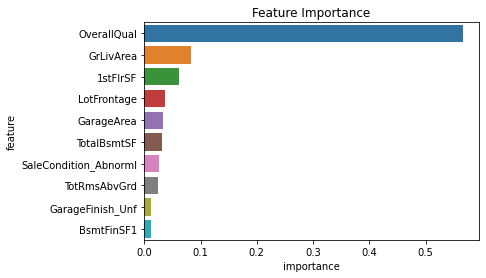

In [285]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning

#### Max Depth

In [292]:
model = DecisionTreeRegressor(max_depth=10)

In [293]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeRegressor(max_depth=10)

In [294]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [295]:
mse(train_target, train_preds,squared=False)

7575.572992121641

In [296]:
mse(val_target, val_preds,squared=False)

43578.869971896136

#### Max Leaf Nodes

In [362]:
model = DecisionTreeRegressor(max_depth=10,random_state=42)

In [363]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [364]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [365]:
mse(train_target, train_preds,squared=False)

7575.572992121641

In [366]:
mse(val_target, val_preds,squared=False)

42732.81369145694

### K-fold Cross Validation

In [157]:
# Assuming 'numerics' and 'encoded_cols' are lists of column names
all_columns = numerics + encoded_cols

# Reorder columns in both DataFrames
train_inputs = train_inputs[all_columns]
val_inputs = val_inputs[all_columns]

# Concatenate DataFrames
combined_inputs = pd.concat([train_inputs, val_inputs], axis=0, ignore_index=True)

In [159]:
combined_outputs = pd.concat([train_target, val_target], axis=0, ignore_index=True)

In [160]:
combined_outputs

0       285000
1       138800
2       188700
3       149000
4       128000
         ...  
1163    157000
1164    107400
1165    149300
1166    110000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming 'X' is your feature matrix and 'y' is your target variable for regression
kf = KFold(n_splits=5,shuffle=True,random_state=30)


mse_scores = cross_val_score(model, combined_inputs, combined_outputs, cv=kf, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for better interpretation)
rmse_scores = np.sqrt(-mse_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [48027.59136317 52872.95311779 52921.55593133 47379.06595833
 47879.34570467]
Mean RMSE: 49816.102415057096


In [182]:
test_preds = model.predict(test_inputs[numerics + encoded_cols])

In [183]:
mse(test_target, test_preds,squared=False)

52303.780498837994

In [367]:
from sklearn.tree import plot_tree, export_text

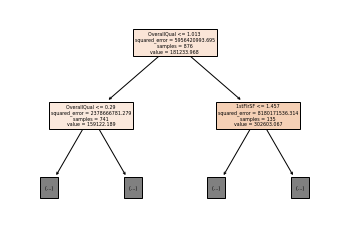

In [368]:
plot_tree(model, feature_names=train_inputs[numerics + encoded_cols].columns, max_depth=1, filled=True);

In [ ]:
Load, cleaning, preprocessing, fitting with tuned parameters - model

In [ ]:
decisiontreeregressor(max_depth=10, max_leaf_nodes=25, max_features=10, random_state=42)

In [ ]:
good validation score

to predict test score

### Saving and Loading Trained Models

In [369]:
import joblib

In [370]:
data = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': inputs,
    'target_col': target,
    'numeric_cols': numerics,
    'categorical_cols': categoricals,
    'encoded_cols': encoded_cols
}

In [371]:
joblib.dump(data, 'dec_reg_house_price.joblib')

['dec_reg_house_price.joblib']

In [372]:
house_price_dec_reg = joblib.load('dec_reg_house_price.joblib')

In [377]:
test_inputs[numerics + encoded_cols].to_csv('test_data.csv',index=False)

In [378]:
test_target.to_csv('test_target.csv',index=False)

In [373]:
test_preds2 = house_price_dec_reg['model'].predict(test_inputs[numerics + encoded_cols])
mse(test_target, test_preds2,squared=False)

43777.32547699217

### Exercise

**Tasks:**
1. Select a dataset from Kaggle with Regression Problem.
2. Load the dataset and explore its structure.
3. Preprocess the data: 
    - Handle missing values
    - Scale numerical variables
    - Encode categorical variables
    - Split the data into training, validation and testing sets.
4. Fit Linear Regression & Decision Tree models.
5. Compare the train & validations scores.
6. Improve scores using Hyperparameter Tuning, GridSearchCV & KFold cross validation.